# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
import matplotlib as mpl

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

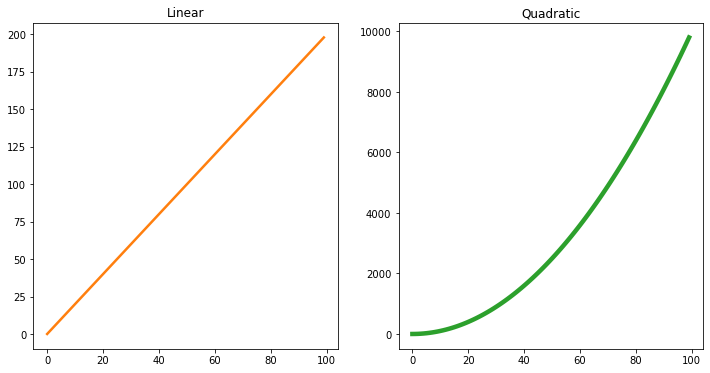

In [5]:
# Method 1

#creating the subplot area
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

#making nice little plots

ax1.plot(x,y,'tab:orange', linewidth = 2.5)
ax1.title.set_text('Linear')

ax2.plot(x,z, 'tab:green',linewidth = 4.5)
ax2.title.set_text('Quadratic')

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

In [6]:
# Method 2
data = pd.DataFrame({'x': x, 'y': y, 'z':z})
data.tail()

,x,y,z
95,95,190,9025
96,96,192,9216
97,97,194,9409
98,98,196,9604
99,99,198,9801


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

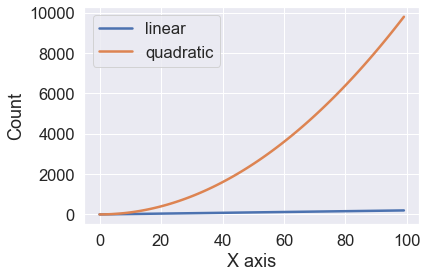

In [10]:
# your code here
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


sns.lineplot(x = "x", y = "y", data=data, label='linear')
sns.lineplot(x = "x", y = "z", data=data, label='quadratic')

plt.xlabel("X axis")
plt.ylabel("Count")
                    
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

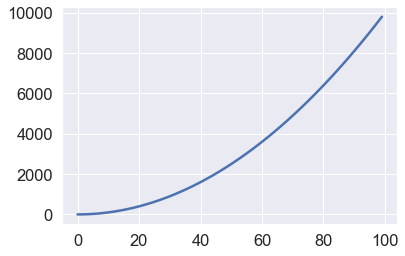

In [11]:
# your code here

plt.plot(x,z, label = "quadratic")


plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
# your code here
fitbit = pd.read_csv("Fitbit2.csv")
fitbit[['Work_or_Weekend','Months_encoded']]

db_f = fitbit.groupby("Months_encoded").agg({"Steps":"median"})
db_f.head()

,Steps
Months_encoded,
1,10366.0
2,9235.0
3,11122.0
4,13846.5
5,11998.0


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

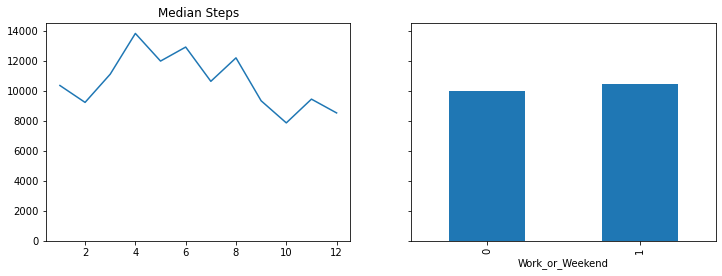

In [8]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

week = fitbit.groupby("Work_or_Weekend").agg({"Steps": "median"})
week

f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize= (12,4))
ax1.plot(db_f["Steps"])
week["Steps"].plot.bar()
ax1.set_title("Median Steps")

plt.savefig("fig.png")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

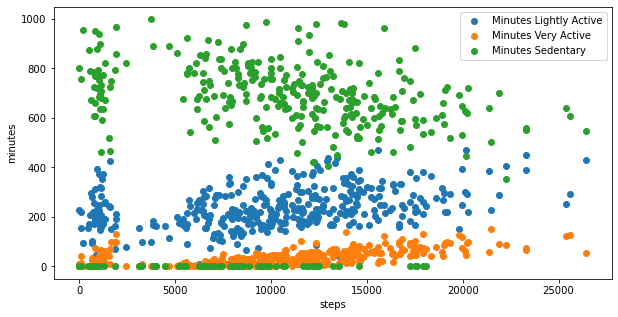

In [9]:
# your code here

fig, ax = plt.subplots(figsize = (10,5))
new_plot = fitbit[['Steps','Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]
y = new_plot.columns[1:]

for col in y:
    plt.scatter(fitbit['Steps'], fitbit[col]),
    plt.xlabel('steps'),
    plt.ylabel('minutes'),
    plt.legend(y),

plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
# your code here
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [11]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object']) 

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [27]:
mpl.style.use('classic')
mpl.rcParams['figure.figsize'] = [12,6]


#### Use the right visulalization to show the distribution of column `Age`.

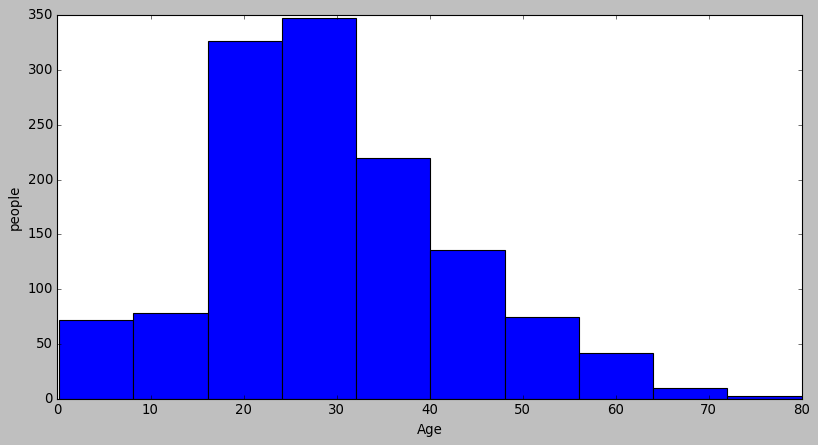

In [21]:
# your code here
plt.hist(titanic["Age"])
plt.xlabel("Age")
plt.ylabel("people")
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

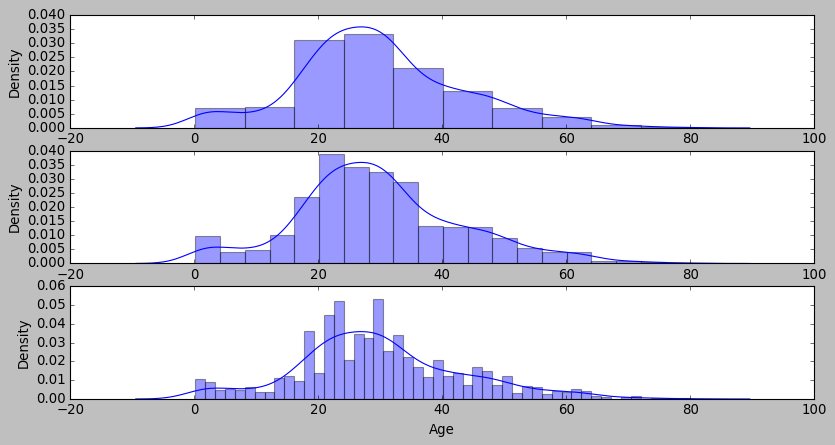

In [56]:
# your code here
f, axes = plt.subplots(3, figsize=(12, 6))
fig.suptitle("people by age")

ax1 = sns.distplot(titanic["Age"], bins = 10, ax = axes[0])
ax2 = sns.distplot(titanic["Age"], bins = 20, ax = axes[1])
ax3 = sns.distplot(titanic["Age"], bins = 50, ax = axes[2])

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""
It affects the size of each bar of the graph

#### Use seaborn to show the distribution of column `Age`.

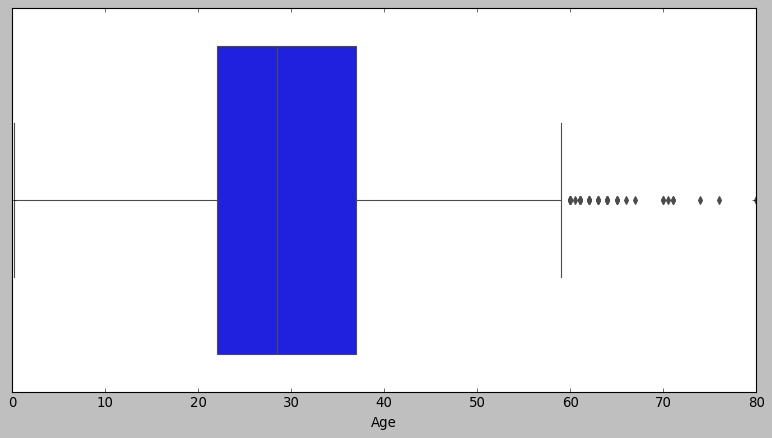

In [31]:
# your code here
ax = sns.boxplot(x="Age", data=titanic)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

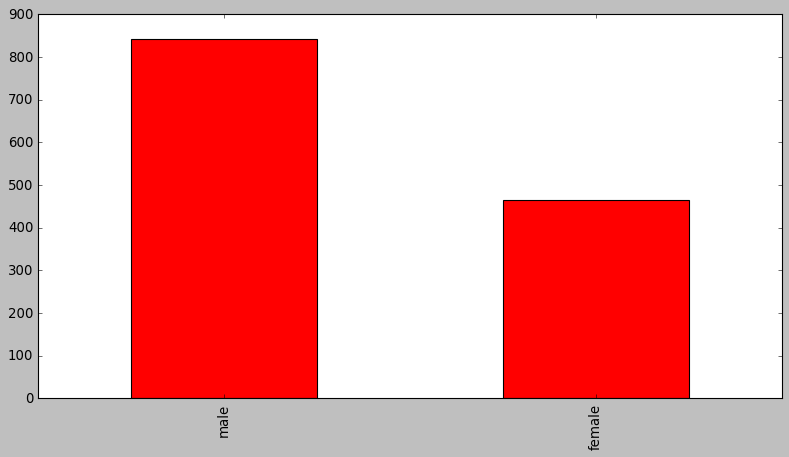

In [32]:
# Method 1 - matplotlib
# your code here
titanic['Gender'].value_counts().plot(kind='bar', color=["red"])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


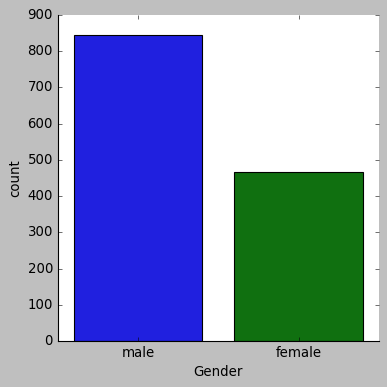

In [34]:
# Method 2 - seaborn
# your code here
sns.catplot('Gender', data=titanic, kind="count")

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:>

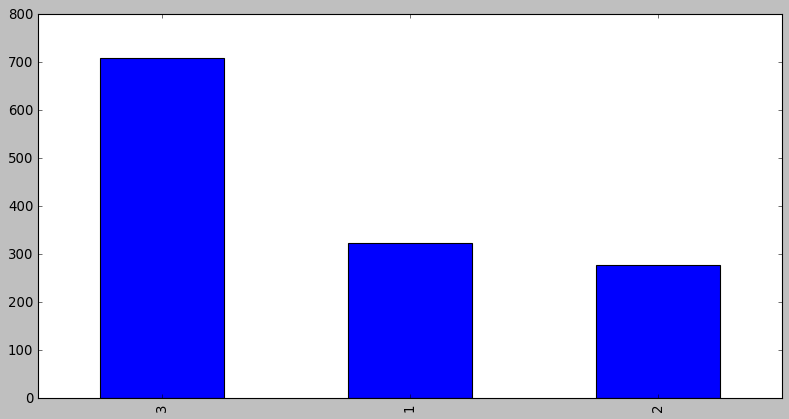

In [37]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar', color=["blue"]) 

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

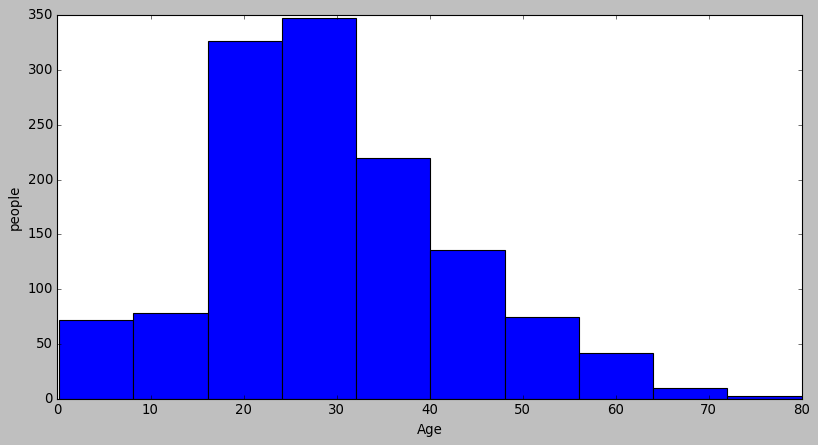

In [38]:
# your code here
plt.hist(titanic["Age"])
plt.xlabel("Age")
plt.ylabel("people")
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""
#most people are in their 30s

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

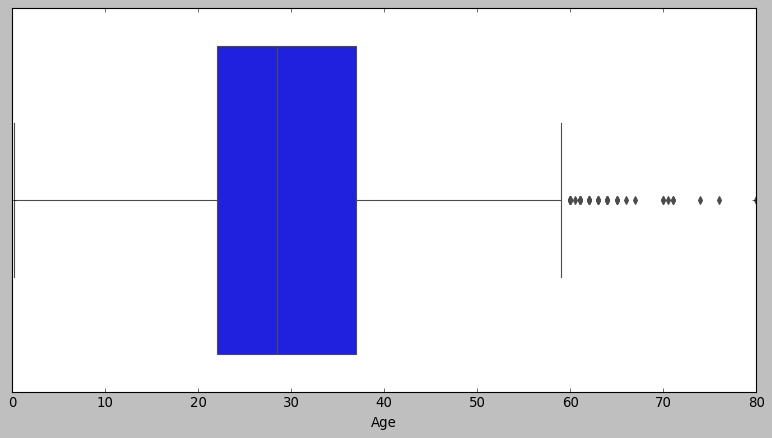

In [50]:
# your code here
sns.boxplot("Age", data=titanic)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='Age'>

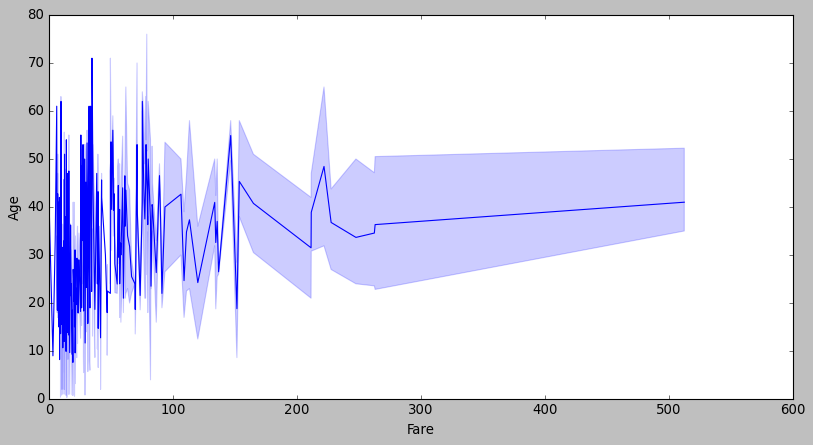

In [63]:
# Method 1 - matplotlib
# your code here
sns.lineplot(titanic.Fare, titanic.Age)

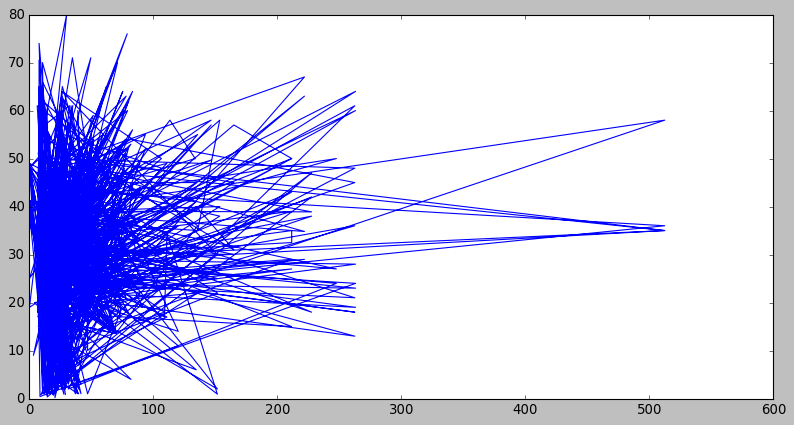

In [60]:
# Method 2 - seaborn
# your code here
plt.plot(titanic.Fare, titanic.Age)

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

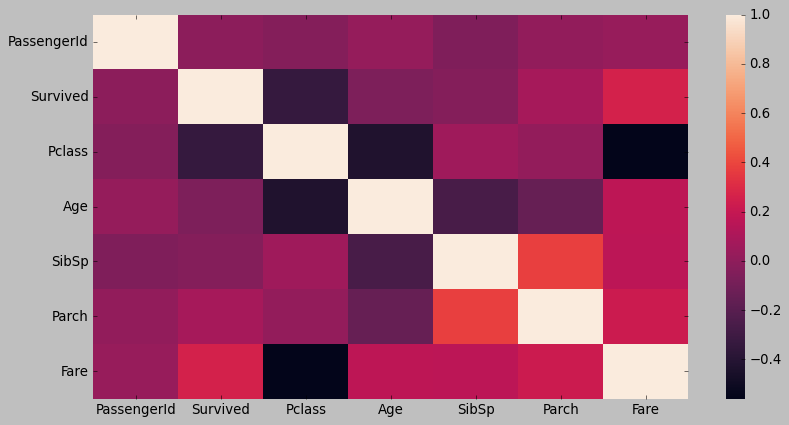

In [47]:
# your code here
sns.heatmap(titanic.corr())

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""
#SibSp and Parch

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

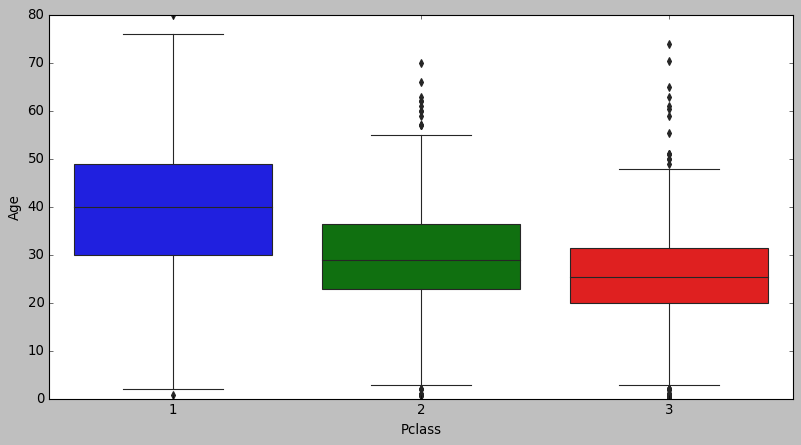

In [44]:
# your code here
sns.boxplot(x='Pclass',y='Age',data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

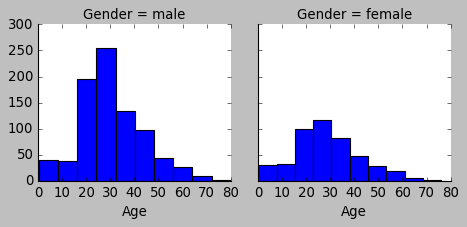

In [43]:
# your code here
Facet = sns.FacetGrid(data=titanic,col='Gender')
Facet.map(plt.hist,'Age')